In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [8]:
def run(is_training=True, render=False):

    env = gym.make('CartPole-v1', render_mode='human' if render else None)

    # Discretize position, velocity, pole angle, and pole angular velocity into segments
    pos_space = np.linspace(-2.4, 2.4, 10)
    vel_space = np.linspace(-4, 4, 10)
    ang_space = np.linspace(-.2095, .2095, 10)
    ang_vel_space = np.linspace(-4, 4, 10)

    if(is_training):
        q = np.zeros((len(pos_space)+1, len(vel_space)+1, len(ang_space)+1, len(ang_vel_space)+1, env.action_space.n)) # init a 11x11x11x11x2 array
    else:
        f = open('cartpole.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    
    learning_rate_a = 0.1 
    discount_factor_g = 0.99 # gamma

    epsilon = 1         
    epsilon_decay_rate = 0.00001 
    rng = np.random.default_rng()   # random number generator

    rewards_per_episode = []
    i = 0

    while(True):

        state = env.reset()[0]      # Starting position, starting velocity always 0
        state_p = np.digitize(state[0], pos_space)
        state_v = np.digitize(state[1], vel_space)
        state_a = np.digitize(state[2], ang_space)
        state_av = np.digitize(state[3], ang_vel_space)

        terminated = False          # True when reached goal

        rewards=0

        while(not terminated and rewards < 10000):

            if is_training and rng.random() < epsilon:
                # Choose random action  (0=go left, 1=go right)
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state_p, state_v, state_a, state_av, :])

            new_state,reward,terminated,_,_ = env.step(action)
            new_state_p = np.digitize(new_state[0], pos_space)
            new_state_v = np.digitize(new_state[1], vel_space)
            new_state_a = np.digitize(new_state[2], ang_space)
            new_state_av= np.digitize(new_state[3], ang_vel_space)

            if is_training:  #update q table
                q[state_p, state_v, state_a, state_av, action] = q[state_p, state_v, state_a, state_av, action] + learning_rate_a * (
                    reward + discount_factor_g*np.max(q[new_state_p, new_state_v, new_state_a, new_state_av,:]) - q[state_p, state_v, state_a, state_av, action]
                )

            state = new_state
            state_p = new_state_p
            state_v = new_state_v
            state_a = new_state_a
            state_av= new_state_av

            rewards+=reward

            if not is_training and rewards%100==0:
                print(f'Episode: {i}  Rewards: {rewards}')

        rewards_per_episode.append(rewards)
        mean_rewards = np.mean(rewards_per_episode[len(rewards_per_episode)-100:])

        if is_training and i%100==0:
            print(f'Episode: {i} {rewards}  Epsilon: {epsilon:0.2f}  Mean Rewards {mean_rewards:0.1f}')

        if mean_rewards>1000:
            break

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        i+=1

    env.close()

    # Save Q table to file
    if is_training:
        f = open('cartpole.pkl','wb')
        pickle.dump(q, f)
        f.close()

    mean_rewards = []
    for t in range(i):
        mean_rewards.append(np.mean(rewards_per_episode[max(0, t-100):(t+1)]))
    plt.plot(mean_rewards)
    plt.savefig(f'cartpole.png')



In [ ]:
import matplotlib.pyplot as plt
plt.savefig('cartpole.png')

Episode: 0 37.0  Epsilon: 1.00  Mean Rewards 37.0
Episode: 100 27.0  Epsilon: 1.00  Mean Rewards 22.6
Episode: 200 14.0  Epsilon: 1.00  Mean Rewards 20.1
Episode: 300 16.0  Epsilon: 1.00  Mean Rewards 22.3
Episode: 400 14.0  Epsilon: 1.00  Mean Rewards 22.8
Episode: 500 18.0  Epsilon: 1.00  Mean Rewards 21.7
Episode: 600 40.0  Epsilon: 0.99  Mean Rewards 22.8
Episode: 700 11.0  Epsilon: 0.99  Mean Rewards 23.3
Episode: 800 116.0  Epsilon: 0.99  Mean Rewards 23.8
Episode: 900 12.0  Epsilon: 0.99  Mean Rewards 23.2
Episode: 1000 34.0  Epsilon: 0.99  Mean Rewards 22.5
Episode: 1100 21.0  Epsilon: 0.99  Mean Rewards 19.8
Episode: 1200 11.0  Epsilon: 0.99  Mean Rewards 22.4
Episode: 1300 13.0  Epsilon: 0.99  Mean Rewards 23.1
Episode: 1400 11.0  Epsilon: 0.99  Mean Rewards 24.8
Episode: 1500 35.0  Epsilon: 0.99  Mean Rewards 22.0
Episode: 1600 14.0  Epsilon: 0.98  Mean Rewards 22.4
Episode: 1700 53.0  Epsilon: 0.98  Mean Rewards 23.2
Episode: 1800 25.0  Epsilon: 0.98  Mean Rewards 24.5
Epis

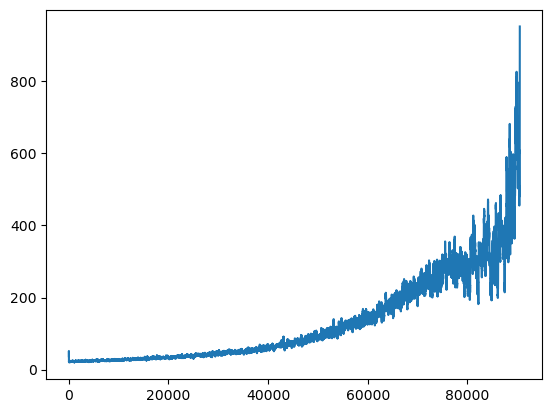

In [9]:
if __name__ == '__main__':
    run(is_training=True, render=False)


Episode: 0  Rewards: 100.0
Episode: 0  Rewards: 200.0
Episode: 0  Rewards: 300.0
Episode: 0  Rewards: 400.0
Episode: 0  Rewards: 500.0
Episode: 0  Rewards: 600.0
Episode: 0  Rewards: 700.0
Episode: 0  Rewards: 800.0
Episode: 0  Rewards: 900.0
Episode: 0  Rewards: 1000.0
Episode: 0  Rewards: 1100.0
Episode: 0  Rewards: 1200.0
Episode: 0  Rewards: 1300.0
Episode: 0  Rewards: 1400.0
Episode: 0  Rewards: 1500.0
Episode: 0  Rewards: 1600.0
Episode: 0  Rewards: 1700.0
Episode: 0  Rewards: 1800.0
Episode: 0  Rewards: 1900.0
Episode: 0  Rewards: 2000.0
Episode: 0  Rewards: 2100.0
Episode: 0  Rewards: 2200.0
Episode: 0  Rewards: 2300.0
Episode: 0  Rewards: 2400.0
Episode: 0  Rewards: 2500.0
Episode: 0  Rewards: 2600.0
Episode: 0  Rewards: 2700.0
Episode: 0  Rewards: 2800.0
Episode: 0  Rewards: 2900.0
Episode: 0  Rewards: 3000.0
Episode: 0  Rewards: 3100.0
Episode: 0  Rewards: 3200.0
Episode: 0  Rewards: 3300.0
Episode: 0  Rewards: 3400.0
Episode: 0  Rewards: 3500.0
Episode: 0  Rewards: 3600.0
E

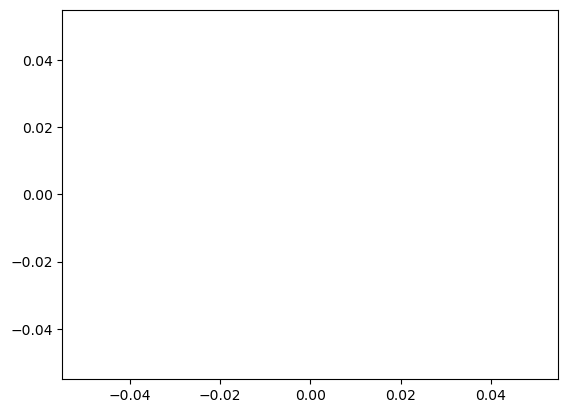

In [6]:
if __name__ == '__main__':   
    run(is_training=False, render=True)
    